In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [40]:
# import data
aki_data = pd.read_csv('path_to_new_file.csv')

In [41]:
aki_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2110 entries, 0 to 2109
Columns: 198 entries, subject_id to gcs_unable
dtypes: float64(170), int64(16), object(12)
memory usage: 3.2+ MB


In [42]:
# rename columns, if necessary
# changing all column names to lower case, and remove special characters and spacing.
aki_data.columns = aki_data.columns.str.lower()
aki_data.columns = aki_data.columns.str.replace(' |/','_')
aki_data.columns

Index(['subject_id', 'hadm_id', 'stay_id', 'weight', 'weight_min',
       'weight_max', 'charttime_aki', 'creat_low_past_7day',
       'creat_low_past_48hr', 'creat',
       ...
       'spo2_mean', 'glucose_min.2', 'glucose_max.2', 'glucose_mean',
       'urineoutput', 'gcs_min', 'gcs_motor', 'gcs_verbal', 'gcs_eyes',
       'gcs_unable'],
      dtype='object', length=198)

In [43]:
pd.set_option('display.max_columns', 100)
aki_data.head()

,subject_id,hadm_id,stay_id,weight,weight_min,weight_max,charttime_aki,creat_low_past_7day,creat_low_past_48hr,creat,aki_stage_creat,uo_rt_6hr,uo_rt_12hr,uo_rt_24hr,aki_stage_uo,aki_stage,kigoord,new_event_flag,kigoord_flag,charttime_rrt,dialysis_present,dialysis_active,dialysis_type,rrtorder,delay_rrt,gender,dod,admittime,dischtime,los_hospital,admission_age,ethnicity,hospital_expire_flag,hospstay_seq,first_hosp_stay,icu_intime,icu_outtime,los_icu,icustay_seq,first_icu_stay,lactate_min,lactate_max,ph_min,ph_max,so2_min,so2_max,po2_min,po2_max,pco2_min,pco2_max,...,alp_min,alp_max,ast_min,ast_max,amylase_min,amylase_max,bilirubin_total_min,bilirubin_total_max,bilirubin_direct_min,bilirubin_direct_max,bilirubin_indirect_min,bilirubin_indirect_max,ck_cpk_min,ck_cpk_max,ck_mb_min,ck_mb_max,ggt_min,ggt_max,ld_ldh_min,ld_ldh_max,heart_rate_min,heart_rate_max,heart_rate_mean,sbp_min,sbp_max,sbp_mean,dbp_min,dbp_max,dbp_mean,mbp_min,mbp_max,mbp_mean,resp_rate_min,resp_rate_max,resp_rate_mean,temperature_min.1,temperature_max.1,temperature_mean,spo2_min,spo2_max,spo2_mean,glucose_min.2,glucose_max.2,glucose_mean,urineoutput,gcs_min,gcs_motor,gcs_verbal,gcs_eyes,gcs_unable
0,19518348,24328934,30041848,104.50,102.0,107.0,2026-04-07 04:00:00,NaN,NaN,NaN,NaN,0.4657,0.6891,0.6891,1.0,1,8,1,1,2026-04-16 14:25:00,1,1,IHD,1,1,M,24-04-26,2026-04-06 17:21:00,2026-04-24 09:00:00,17.652083,66.262081,UNKNOWN,1,1,t,2026-04-06 17:22:00,2026-04-24 13:11:00,17.83,1,t,1.3,1.3,7.41,7.42,98.0,98.0,90.0,147.0,39.0,40.0,...,61.0,61.0,44.0,44.0,NaN,NaN,0.3,0.3,NaN,NaN,NaN,NaN,484.0,644.0,15.0,23.0,NaN,NaN,485.0,485.0,66.0,138.0,89.625000,95.0,152.0,132.500000,48.0,91.0,68.5000,59.0,98.0,83.090909,18.0,27.0,21.673077,36.83,38.11,37.405000,93.0,99.0,96.909091,172.0,321.0,257.500000,2895.0,10,5.0,1.0,4.0,0
1,18070922,27400972,30078723,100.00,100.0,100.0,2047-06-30 08:00:00,NaN,NaN,NaN,NaN,0.4334,0.6007,0.9219,1.0,1,32,1,1,2047-07-05 19:15:00,1,1,CRRT,1,1,M,NaN,2047-06-28 21:56:00,2047-07-30 14:40:00,31.697222,70.489938,BLACK/AFRICAN AMERICAN,0,1,t,2047-06-28 21:59:00,2047-07-30 15:03:00,31.71,1,t,1.2,1.2,7.35,7.37,NaN,NaN,99.0,99.0,38.0,40.0,...,36.0,37.0,12.0,13.0,NaN,NaN,0.6,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,96.0,84.208333,95.0,116.0,107.500000,49.0,83.5,56.4600,62.0,157.0,74.019231,12.0,23.0,17.134615,36.72,37.56,36.978000,92.0,99.0,96.680000,106.0,140.0,123.666667,2400.0,3,1.0,1.0,1.0,0
2,17414351,23018977,30254621,98.95,85.0,103.6,1979-09-14 12:12:00,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,3.0,3,4,1,1,1979-09-14 12:23:00,1,1,CRRT,1,0,M,NaN,1979-09-14 00:06:00,1980-01-03 18:15:00,111.756250,37.700917,UNKNOWN,0,1,t,1979-09-14 00:07:00,1979-10-17 19:59:00,33.83,1,t,1.2,2.5,7.34,7.42,93.0,93.0,36.0,85.0,29.0,36.0,...,351.0,351.0,104.0,104.0,NaN,NaN,36.3,36.3,26.7,26.7,NaN,NaN,36.0,36.0,4.0,4.0,NaN,NaN,331.0,331.0,71.0,93.0,80.956522,82.0,118.0,101.958333,36.0,63.0,52.4375,51.0,78.0,67.541667,12.0,36.0,20.000000,35.50,36.70,36.132143,92.0,100.0,95.250000,114.0,228.0,152.625000,10.0,6,4.0,1.0,1.0,0
3,17555267,21215796,30326472,105.70,104.0,107.4,2028-12-20 05:38:00,NaN,NaN,NaN,NaN,2.7933,2.7933,0.2665,3.0,3,6,1,1,2028-12-24 18:20:00,1,1,CRRT,1,1,F,26-12-28,2028-12-19 05:54:00,2028-12-26 00:00:00,6.754167,59.967156,WHITE,1,1,t,2028-12-19 05:58:00,2028-12-27 00:08:00,7.76,1,t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,133.0,164.0,162.0,189.0,NaN,NaN,3.0,3.3,NaN,NaN,NaN,NaN,1011.0,1131.0,14.0,16.0,NaN,NaN,374.0,378.0,78.0,97.0,87.521739,75.0,161.0,108.000000,34.0,131.0,56.4000,54.0,139.0,70.700000,17.0,32.0,24.086957,36.39,37.00,36.776667,88.0,100.0,96.478261,47.0,134.0,102.714286,425.0,13,6.0,5.0,2.0,0
4,18571406,23198317,30341422,69.00,66.7,71.3,1980-01-23 09:00:00,NaN,NaN,NaN,NaN,0.4909,0.6812,0.6812,1.0,1,7,1,1,1980-01-23 14:00:00,1,1,IHD,1,0,M,NaN,1980-01-23 02:04:00,1980-01-28 15:00:00,5.538889,79.060470,WHITE,0,1,t,1980-01-23 02:05:00,1980-01-24 00:04:00,0.92,1,t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [44]:
# missing data
pd.set_option('display.max_rows', 200)
pd.isna(aki_data).sum()

subject_id                      0
hadm_id                         0
stay_id                         0
weight                          9
weight_min                      9
weight_max                      9
charttime_aki                   0
creat_low_past_7day           752
creat_low_past_48hr           778
creat                         752
aki_stage_creat               752
uo_rt_6hr                    1344
uo_rt_12hr                   1344
uo_rt_24hr                   1344
aki_stage_uo                 1344
aki_stage                       0
kigoord                         0
new_event_flag                  0
kigoord_flag                    0
charttime_rrt                   0
dialysis_present                0
dialysis_active                 0
dialysis_type                  90
rrtorder                        0
delay_rrt                       0
gender                          0
dod                          1225
admittime                       0
dischtime                       0
los_hospital  

In [45]:
# uneven sample
aki_data['delay_rrt'].value_counts()

delay_rrt
1    1720
0     390
Name: count, dtype: int64

In [46]:
# clinician's input
aki_data.drop(columns=['weight_min', 'weight_max',
                       'charttime_aki',
                       'creat_low_past_7day','creat_low_past_48hr','creat','aki_stage_creat',
                       'uo_rt_6hr','uo_rt_12hr','uo_rt_24hr','aki_stage_uo',
                       'kigoord','new_event_flag','kigoord_flag',
                       'charttime_rrt',
                       'dialysis_present','dialysis_active','dialysis_type',
                       'rrtorder',
                       'dod',
                       'admittime','dischtime','los_hospital',
                       'hospital_expire_flag','hospstay_seq','first_hosp_stay',
                       'icu_intime','icu_outtime','los_icu',
                       'icustay_seq', 'first_icu_stay',
                       'lactate_min',
                       'so2_max',
                       'po2_max',
                       'aado2_min','aado2_max',
                       'aado2_calc_min',
                       'pao2fio2ratio_min', 'pao2fio2ratio_max',
                       'baseexcess_max',
                       'bicarbonate_min','bicarbonate_max',
                       'totalco2_min', 'totalco2_max',
                       'hematocrit_min','hematocrit_max',
                       'hemoglobin_min','hemoglobin_max',
                       'carboxyhemoglobin_min','carboxyhemoglobin_max',
                       'methemoglobin_min','methemoglobin_max',
                       'temperature_min','temperature_max',
                       'chloride_min','chloride_max',
                       'calcium_min','calcium_max',
                       'glucose_min','glucose_max',
                       'potassium_min','potassium_max',
                       'sodium_min','sodium_max',
                       'globulin_min','globulin_max',
                       'total_protein_min','total_protein_max',
                       'atypical_lymphocytes_min','atypical_lymphocytes_max',
                       'bands_min','bands_max',
                       'immature_granulocytes_min','immature_granulocytes_max',
                       'metamyelocytes_min','metamyelocytes_max',
                       'nrbc_min','nrbc_max',
                       'd_dimer_min','d_dimer_max',
                       'thrombin_min','thrombin_max',
                       'inr_min',
                       'pt_min',
                       'ptt_min',
                       'alt_min',
                       'alp_min',
                       'ast_min',
                       'amylase_min','amylase_max',
                       'bilirubin_total_min',
                       'bilirubin_direct_min','bilirubin_direct_max',
                       'bilirubin_indirect_min','bilirubin_indirect_max',
                       'ck_cpk_min',
                       'ck_mb_min',
                       'ggt_min','ggt_max',
                       'ld_ldh_min',
                       'heart_rate_min','heart_rate_max',
                       'sbp_min','sbp_max',
                       'dbp_min','dbp_max',
                       'mbp_min','mbp_max',
                       'resp_rate_min','resp_rate_max',
                       'temperature_min.1','temperature_max.1',
                       'spo2_min','spo2_max',
                       'glucose_min.2','glucose_max.2',
                       'gcs_motor','gcs_verbal','gcs_eyes','gcs_unable'],inplace=True)

In [47]:
pd.set_option('display.max_rows', 85)
aki_data.info()
# 78 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2110 entries, 0 to 2109
Data columns (total 78 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   subject_id           2110 non-null   int64  
 1   hadm_id              2110 non-null   int64  
 2   stay_id              2110 non-null   int64  
 3   weight               2101 non-null   float64
 4   aki_stage            2110 non-null   int64  
 5   delay_rrt            2110 non-null   int64  
 6   gender               2110 non-null   object 
 7   admission_age        2110 non-null   float64
 8   ethnicity            2110 non-null   object 
 9   lactate_max          1639 non-null   float64
 10  ph_min               1762 non-null   float64
 11  ph_max               1762 non-null   float64
 12  so2_min              1029 non-null   float64
 13  po2_min              1762 non-null   float64
 14  pco2_min             1762 non-null   float64
 15  pco2_max             1762 non-null   f

In [48]:
aki_data = aki_data[aki_data.columns[aki_data.isnull().sum()<125]] 

In [49]:
aki_data.shape

(2110, 47)

47 columns left.

In [50]:
pd.isnull(aki_data).sum()

subject_id             0
hadm_id                0
stay_id                0
weight                 9
aki_stage              0
delay_rrt              0
gender                 0
admission_age          0
ethnicity              0
hematocrit_min.1       4
hematocrit_max.1       4
hemoglobin_min.1       6
hemoglobin_max.1       6
platelets_min          4
platelets_max          4
wbc_min                5
wbc_max                5
aniongap_min           3
aniongap_max           3
bicarbonate_min.1      3
bicarbonate_max.1      3
bun_min                3
bun_max                3
calcium_min.1         73
calcium_max.1         73
chloride_min.1         3
chloride_max.1         3
creatinine_min         3
creatinine_max         3
glucose_min.1          6
glucose_max.1          6
sodium_min.1           3
sodium_max.1           3
potassium_min.1        3
potassium_max.1        3
inr_max              107
pt_max               107
ptt_max              116
heart_rate_mean       10
sbp_mean              23


In [51]:
# drop rows
aki_data.dropna(inplace=True)

In [52]:
aki_data.shape

(1786, 47)

1786 rows left.

In [53]:
# remove the .1
aki_data.columns = aki_data.columns.str.replace('.1','')

In [54]:
aki_data.head()

,subject_id,hadm_id,stay_id,weight,aki_stage,delay_rrt,gender,admission_age,ethnicity,hematocrit_min,hematocrit_max,hemoglobin_min,hemoglobin_max,platelets_min,platelets_max,wbc_min,wbc_max,aniongap_min,aniongap_max,bicarbonate_min,bicarbonate_max,bun_min,bun_max,calcium_min,calcium_max,chloride_min,chloride_max,creatinine_min,creatinine_max,glucose_min,glucose_max,sodium_min,sodium_max,potassium_min,potassium_max,inr_max,pt_max,ptt_max,heart_rate_mean,sbp_mean,dbp_mean,mbp_mean,resp_rate_mean,temperature_mean,spo2_mean,glucose_mean,gcs_min
0,19518348,24328934,30041848,104.50,1,1,M,66.262081,UNKNOWN,31.4,31.9,11.3,11.3,246.0,247.0,11.2,11.2,20.0,23.0,23.0,24.0,109.0,114.0,8.7,9.5,106.0,114.0,3.0,3.1,172.0,317.0,146.0,154.0,3.9,4.1,1.3,14.6,47.5,89.625000,132.500000,68.5000,83.090909,21.673077,37.405000,96.909091,257.500000,10
1,18070922,27400972,30078723,100.00,1,1,M,70.489938,BLACK/AFRICAN AMERICAN,34.0,34.2,11.3,11.4,185.0,186.0,12.1,13.5,14.0,16.0,20.0,21.0,36.0,41.0,7.5,7.7,103.0,104.0,1.1,1.1,106.0,140.0,134.0,135.0,4.4,4.8,1.3,13.9,25.0,84.208333,107.500000,56.4600,74.019231,17.134615,36.978000,96.680000,123.666667,3
2,17414351,23018977,30254621,98.95,3,0,M,37.700917,UNKNOWN,27.1,29.4,9.9,10.4,185.0,252.0,22.4,31.1,26.0,30.0,15.0,18.0,40.0,53.0,7.4,10.2,73.0,76.0,7.8,10.5,121.0,228.0,118.0,119.0,3.3,3.8,2.6,27.5,36.0,80.956522,101.958333,52.4375,67.541667,20.000000,36.132143,95.250000,152.625000,6
3,17555267,21215796,30326472,105.70,3,1,F,59.967156,WHITE,25.0,30.9,8.1,10.1,70.0,107.0,7.6,14.5,11.0,13.0,19.0,23.0,15.0,16.0,7.5,7.8,106.0,110.0,1.1,1.2,47.0,127.0,140.0,141.0,3.2,4.0,2.6,28.4,51.3,87.521739,108.000000,56.4000,70.700000,24.086957,36.776667,96.478261,102.714286,13
4,18571406,23198317,30341422,69.00,1,0,M,79.060470,WHITE,38.0,38.0,13.2,13.2,262.0,262.0,10.8,10.8,18.0,18.0,21.0,21.0,19.0,19.0,9.4,9.4,106.0,106.0,1.3,1.3,126.0,126.0,141.0,141.0,3.7,3.7,1.2,13.8,35.6,90.318182,140.800000,71.8500,88.285714,21.000000,36.620000,95.782609,124.000000,15


In [55]:
aki_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1786 entries, 0 to 2109
Data columns (total 47 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subject_id        1786 non-null   int64  
 1   hadm_id           1786 non-null   int64  
 2   stay_id           1786 non-null   int64  
 3   weight            1786 non-null   float64
 4   aki_stage         1786 non-null   int64  
 5   delay_rrt         1786 non-null   int64  
 6   gender            1786 non-null   object 
 7   admission_age     1786 non-null   float64
 8   ethnicity         1786 non-null   object 
 9   hematocrit_min    1786 non-null   float64
 10  hematocrit_max    1786 non-null   float64
 11  hemoglobin_min    1786 non-null   float64
 12  hemoglobin_max    1786 non-null   float64
 13  platelets_min     1786 non-null   float64
 14  platelets_max     1786 non-null   float64
 15  wbc_min           1786 non-null   float64
 16  wbc_max           1786 non-null   float64
 17  

## categorical data

In [56]:
# should be categorical
aki_data[['subject_id','hadm_id','stay_id']] = aki_data[['subject_id','hadm_id','stay_id']].astype(str)

In [57]:
# select only categorical columns
nom_aki = aki_data.select_dtypes(include='object').copy()

In [58]:
nom_aki.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1786 entries, 0 to 2109
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   subject_id  1786 non-null   object
 1   hadm_id     1786 non-null   object
 2   stay_id     1786 non-null   object
 3   gender      1786 non-null   object
 4   ethnicity   1786 non-null   object
dtypes: object(5)
memory usage: 83.7+ KB


**gender**

In [62]:
nom_aki['gender'].value_counts()

gender
M    1077
F     709
Name: count, dtype: int64

In [63]:
nom_aki['delay_rrt'] = aki_data['delay_rrt']

In [64]:
# convert gender to numerical
nom_aki['gender']=nom_aki['gender'].apply(lambda x: 1 if x=='M' else 0)

In [65]:
nom_aki['gender'].value_counts()

gender
1    1077
0     709
Name: count, dtype: int64

**ethnicity**

In [66]:
nom_aki['ethnicity'].unique()

array(['UNKNOWN', 'BLACK/AFRICAN AMERICAN', 'WHITE', 'UNABLE TO OBTAIN',
       'HISPANIC/LATINO', 'OTHER', 'AMERICAN INDIAN/ALASKA NATIVE',
       'ASIAN'], dtype=object)

In [67]:
nom_aki['ethnicity'].value_counts()

ethnicity
WHITE                            1010
UNKNOWN                           285
BLACK/AFRICAN AMERICAN            230
OTHER                              88
HISPANIC/LATINO                    83
ASIAN                              43
UNABLE TO OBTAIN                   41
AMERICAN INDIAN/ALASKA NATIVE       6
Name: count, dtype: int64

In [68]:
nom_aki['ethnicity'] = nom_aki['ethnicity'].str.lower()
nom_aki['ethnicity'] = nom_aki['ethnicity'].str.replace(' |/','_')

In [69]:
# whites has the biggest percentage
max(nom_aki['ethnicity'].value_counts())/len(nom_aki)

0.5655095184770437

In [70]:
nom_aki['ethnicity'].unique()

array(['unknown', 'black/african american', 'white', 'unable to obtain',
       'hispanic/latino', 'other', 'american indian/alaska native',
       'asian'], dtype=object)

In [71]:
ethnic_label = {'unknown': 'unknown', 
                'black_african_american': 'black', 
                'white': 'white',
                'unable_to_obtain': 'unknown', 
               'hispanic_latino': 'latino', 
                'other': 'minorities', 
                'american_indian_alaska_native': 'minorities', 
                'asian': 'minorities' }

In [72]:
# grouped 'unknown','unable to obtain' as 'unknown'
# grouped 'other', 'asian', 'native' as 'minorities'
nom_aki['ethnicity'] = nom_aki['ethnicity'].map(ethnic_label)

In [73]:
nom_aki['ethnicity'].value_counts()

ethnicity
white         1010
unknown        285
minorities     131
Name: count, dtype: int64

In [74]:
# current categorical
aki_data.drop(columns=['subject_id','hadm_id','stay_id'],inplace=True)
aki_data['gender']=aki_data['gender'].apply(lambda x: 1 if x=='M' else 0)

In [75]:
# current categorical ethnicity
aki_data['ethnicity'] = aki_data['ethnicity'].str.lower()
aki_data['ethnicity'] = aki_data['ethnicity'].str.replace(' |/','_')
aki_data['ethnicity'] = aki_data['ethnicity'].map(ethnic_label)

## continuous data

In [76]:
num_aki = aki_data.select_dtypes(include=['int64','float64']).copy()

In [77]:
num_aki.head()

,weight,aki_stage,delay_rrt,gender,admission_age,hematocrit_min,hematocrit_max,hemoglobin_min,hemoglobin_max,platelets_min,platelets_max,wbc_min,wbc_max,aniongap_min,aniongap_max,bicarbonate_min,bicarbonate_max,bun_min,bun_max,calcium_min,calcium_max,chloride_min,chloride_max,creatinine_min,creatinine_max,glucose_min,glucose_max,sodium_min,sodium_max,potassium_min,potassium_max,inr_max,pt_max,ptt_max,heart_rate_mean,sbp_mean,dbp_mean,mbp_mean,resp_rate_mean,temperature_mean,spo2_mean,glucose_mean,gcs_min
0,104.50,1,1,1,66.262081,31.4,31.9,11.3,11.3,246.0,247.0,11.2,11.2,20.0,23.0,23.0,24.0,109.0,114.0,8.7,9.5,106.0,114.0,3.0,3.1,172.0,317.0,146.0,154.0,3.9,4.1,1.3,14.6,47.5,89.625000,132.500000,68.5000,83.090909,21.673077,37.405000,96.909091,257.500000,10
1,100.00,1,1,1,70.489938,34.0,34.2,11.3,11.4,185.0,186.0,12.1,13.5,14.0,16.0,20.0,21.0,36.0,41.0,7.5,7.7,103.0,104.0,1.1,1.1,106.0,140.0,134.0,135.0,4.4,4.8,1.3,13.9,25.0,84.208333,107.500000,56.4600,74.019231,17.134615,36.978000,96.680000,123.666667,3
2,98.95,3,0,1,37.700917,27.1,29.4,9.9,10.4,185.0,252.0,22.4,31.1,26.0,30.0,15.0,18.0,40.0,53.0,7.4,10.2,73.0,76.0,7.8,10.5,121.0,228.0,118.0,119.0,3.3,3.8,2.6,27.5,36.0,80.956522,101.958333,52.4375,67.541667,20.000000,36.132143,95.250000,152.625000,6
3,105.70,3,1,0,59.967156,25.0,30.9,8.1,10.1,70.0,107.0,7.6,14.5,11.0,13.0,19.0,23.0,15.0,16.0,7.5,7.8,106.0,110.0,1.1,1.2,47.0,127.0,140.0,141.0,3.2,4.0,2.6,28.4,51.3,87.521739,108.000000,56.4000,70.700000,24.086957,36.776667,96.478261,102.714286,13
4,69.00,1,0,1,79.060470,38.0,38.0,13.2,13.2,262.0,262.0,10.8,10.8,18.0,18.0,21.0,21.0,19.0,19.0,9.4,9.4,106.0,106.0,1.3,1.3,126.0,126.0,141.0,141.0,3.7,3.7,1.2,13.8,35.6,90.318182,140.800000,71.8500,88.285714,21.000000,36.620000,95.782609,124.000000,15


In [78]:
num_aki.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1786 entries, 0 to 2109
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   weight            1786 non-null   float64
 1   aki_stage         1786 non-null   int64  
 2   delay_rrt         1786 non-null   int64  
 3   gender            1786 non-null   int64  
 4   admission_age     1786 non-null   float64
 5   hematocrit_min    1786 non-null   float64
 6   hematocrit_max    1786 non-null   float64
 7   hemoglobin_min    1786 non-null   float64
 8   hemoglobin_max    1786 non-null   float64
 9   platelets_min     1786 non-null   float64
 10  platelets_max     1786 non-null   float64
 11  wbc_min           1786 non-null   float64
 12  wbc_max           1786 non-null   float64
 13  aniongap_min      1786 non-null   float64
 14  aniongap_max      1786 non-null   float64
 15  bicarbonate_min   1786 non-null   float64
 16  bicarbonate_max   1786 non-null   float64
 17  

In [79]:
# remove outliers in glucose_mean
num_aki = num_aki[num_aki['glucose_mean']<3000]
aki_data = aki_data[aki_data['glucose_mean']<3000]

**weight**

In [80]:
# weight looks suspicious
num_aki['weight'].describe() 

count    1778.000000
mean       87.692438
std        26.077158
min        26.400000
25%        70.000000
50%        84.100000
75%        99.975000
max       296.800000
Name: weight, dtype: float64

# EDA

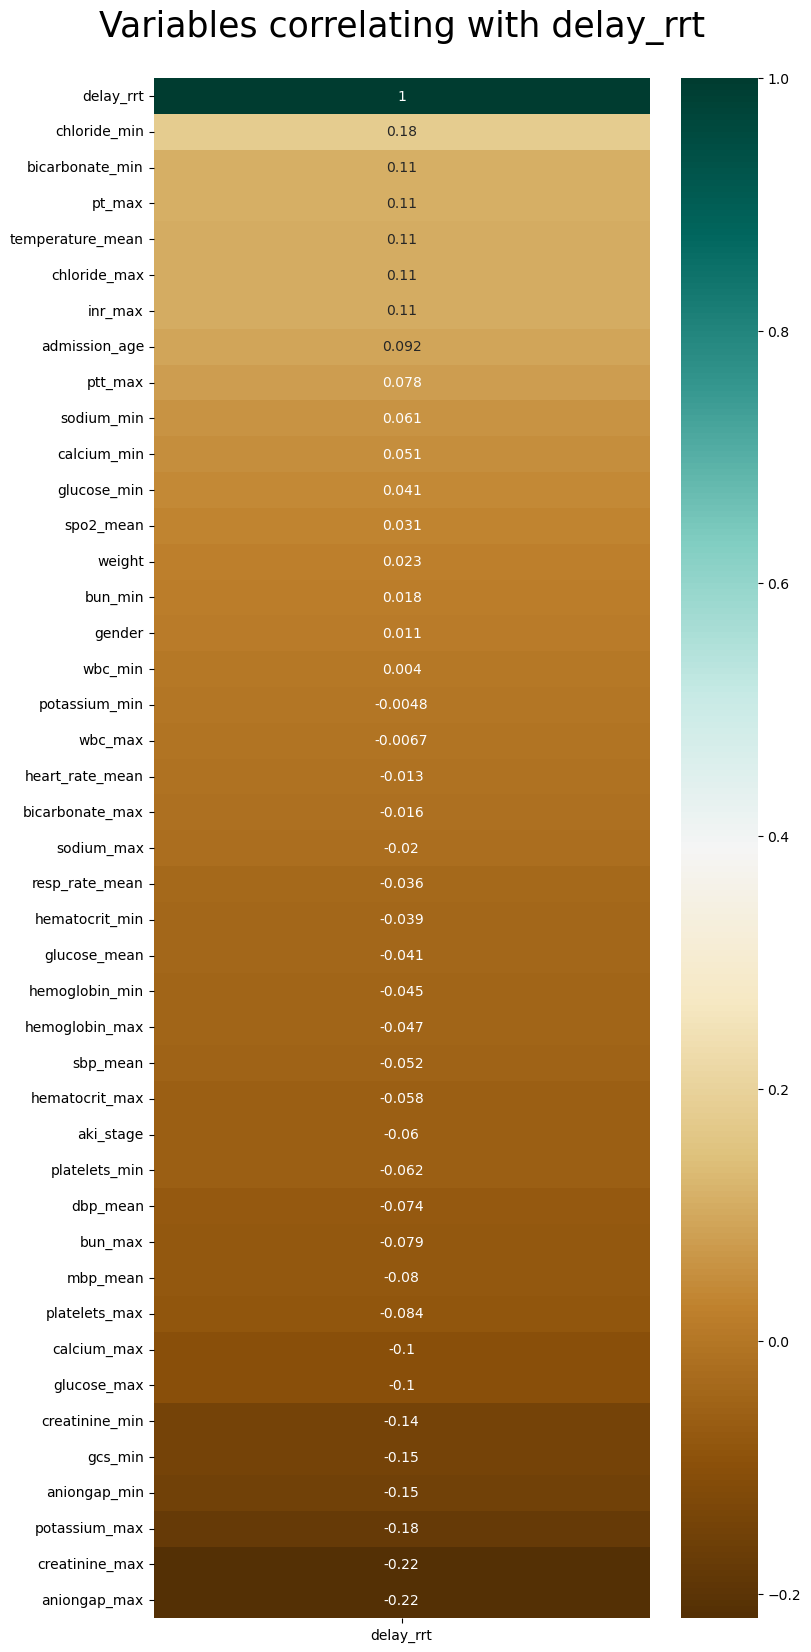

In [84]:
# find correlation
# only plots continuous, discrete and converted ordinal variables
plt.figure(figsize=(8, 20))
ax = sns.heatmap(num_aki.corr(method='spearman')[['delay_rrt']].sort_values(by='delay_rrt', ascending=False), annot=True, cmap='BrBG')
ax.set_title('Variables correlating with delay_rrt', fontdict={'fontsize':25}, pad=30);

In [85]:
# clearer dataframe
# for corr >= 0.05
aki_corr = num_aki.corr(method='spearman').abs()
aki_corr.loc[aki_corr['delay_rrt']>=0.04,['delay_rrt']].sort_values(by=['delay_rrt'],ascending=False)

,delay_rrt
delay_rrt,1.000000
aniongap_max,0.219092
creatinine_max,0.215134
potassium_max,0.178538
chloride_min,0.176414
aniongap_min,0.153351
gcs_min,0.145449
creatinine_min,0.143292
bicarbonate_min,0.111833
pt_max,0.109496


In [75]:
# clearer dataframe
# for corr >= 0.05
aki_corr = num_aki.corr(method='spearman').abs()
aki_corr.loc[aki_corr['delay_rrt']>=0.04,['delay_rrt']].sort_values(by=['delay_rrt'],ascending=False)

,delay_rrt
delay_rrt,1.000000
aniongap_max,0.219092
creatinine_max,0.215134
potassium_max,0.178538
chloride_min,0.176414
aniongap_min,0.153351
gcs_min,0.145449
creatinine_min,0.143292
bicarbonate_min,0.111833
pt_max,0.109496


There are 30 columns above. 
Clinician suggested dropping 'sbp_mean' and 'dbp_mean', since 'mbp_mean' is derived from them.


In [86]:
# drop these? 
aki_corr.loc[aki_corr['delay_rrt']<0.04,['delay_rrt']]

,delay_rrt
weight,0.022518
gender,0.011053
hematocrit_min,0.038520
wbc_min,0.003966
wbc_max,0.006672
bicarbonate_max,0.016021
bun_min,0.018054
sodium_max,0.019904
potassium_min,0.004764
heart_rate_mean,0.012692


In [87]:
# drop categotical columns ?
# performing chisq for nominal ethnicity feature

# relationship between ethnicity and delay_rrt
obs = pd.crosstab(aki_data['ethnicity'],aki_data['delay_rrt'])
chi2, p, dof, expected = stats.chi2_contingency(obs)
print(chi2,p)

1.2511296149266904 0.5349591942294477


p=0.435. So do not reject null hypothesis. Both variables are independent (ie no correlation). Therefore, I am inclined to drop 'ethnicity'. Also, as a categorical variable (with >2 labels), I do not have to perform one-hot-encoding later. 


In [88]:
# performing chisq for nominal gender feature

# relationship between ethnicity and delay_rrt
obs = pd.crosstab(aki_data['gender'],aki_data['delay_rrt'])
chi2, p, dof, expected = stats.chi2_contingency(obs)
print(chi2,p)

0.1629194468840113 0.686482753454661


p=0.686. So do not reject null hypothesis. Both variables are independent (ie no correlation). Therefore, I am inclined to drop 'gender' too?


In [89]:
# current dataset
aki_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1778 entries, 0 to 2109
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   weight            1778 non-null   float64
 1   aki_stage         1778 non-null   int64  
 2   delay_rrt         1778 non-null   int64  
 3   gender            1778 non-null   int64  
 4   admission_age     1778 non-null   float64
 5   ethnicity         1420 non-null   object 
 6   hematocrit_min    1778 non-null   float64
 7   hematocrit_max    1778 non-null   float64
 8   hemoglobin_min    1778 non-null   float64
 9   hemoglobin_max    1778 non-null   float64
 10  platelets_min     1778 non-null   float64
 11  platelets_max     1778 non-null   float64
 12  wbc_min           1778 non-null   float64
 13  wbc_max           1778 non-null   float64
 14  aniongap_min      1778 non-null   float64
 15  aniongap_max      1778 non-null   float64
 16  bicarbonate_min   1778 non-null   float64
 17  

export dataset

In [94]:
aki_data.to_csv('cleaned_data.csv',index=False)

In [95]:
df = pd.read_csv('cleaned_data.csv')

In [96]:
df['ethnicity'] = df['ethnicity'].replace(np.nan,'unknown')

print(df['ethnicity'].head())

0    unknown
1    unknown
2    unknown
3      white
4      white
Name: ethnicity, dtype: object
